In [1]:
import pandas as pd
import numpy as np
import re
pd.set_option('mode.chained_assignment', None)

In [3]:
df = pd.read_csv('adu.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: >

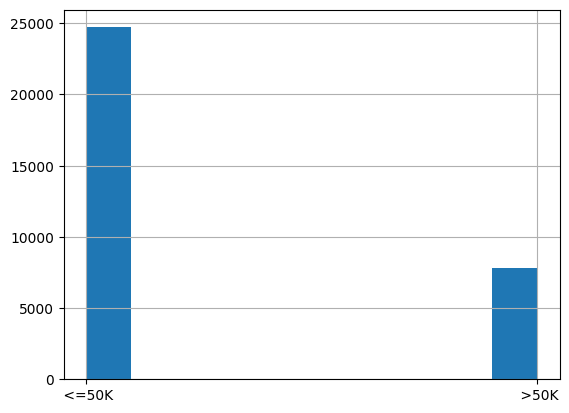

In [4]:
df[14].hist()

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
for i in df.columns:
  x=0
  for j in df[i]:
    if j==' ?':
      x+=1
  print(i,x)

age 0
workclass 1836
fnlwgt 0
education 0
education_num 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
capital_gain 0
capital_loss 0
hours_per_week 0
native_country 583
income 0


In [10]:
for i in df.columns:
  print(df[i].mode())

0    36
Name: age, dtype: int64
0     Private
Name: workclass, dtype: object
0    123011
1    164190
2    203488
Name: fnlwgt, dtype: int64
0     HS-grad
Name: education, dtype: object
0    9
Name: education_num, dtype: int64
0     Married-civ-spouse
Name: marital_status, dtype: object
0     Prof-specialty
Name: occupation, dtype: object
0     Husband
Name: relationship, dtype: object
0     White
Name: race, dtype: object
0     Male
Name: sex, dtype: object
0    0
Name: capital_gain, dtype: int64
0    0
Name: capital_loss, dtype: int64
0    40
Name: hours_per_week, dtype: int64
0     United-States
Name: native_country, dtype: object
0     <=50K
Name: income, dtype: object


In [11]:
df['workclass']=df['workclass'].replace([' ?'],' Private')
df['occupation']=df['occupation'].replace([' ?'],' Prof-specialty')
df['native_country']=df['native_country'].replace([' ?'],' United-States')

In [12]:
for i in df.columns:
  x=0
  for j in df[i]:
    if j==' ?':
      x+=1
  print(i,x)

age 0
workclass 0
fnlwgt 0
education 0
education_num 0
marital_status 0
occupation 0
relationship 0
race 0
sex 0
capital_gain 0
capital_loss 0
hours_per_week 0
native_country 0
income 0


In [13]:
Y_col = 'income'
X_cols = (df.loc[:, df.columns != Y_col].columns)
print(Y_col)
print(X_cols)

income
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')


In [14]:
df_train = df.sample(frac=0.67, random_state=1)
df_test=df.drop(df_train.index)
print (df_train.shape, df_test.shape)

(21816, 15) (10745, 15)


In [15]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


In [16]:
X_train = df_train[X_cols]
X_test = df_test[X_cols]
Y_train = df_train[Y_col]
Y_test = df_test[Y_col]
print (Y_train, Y_test)

0         <=50K
1         <=50K
2          >50K
3         <=50K
4         <=50K
          ...  
21811     <=50K
21812     <=50K
21813     <=50K
21814      >50K
21815     <=50K
Name: income, Length: 21816, dtype: object 0         <=50K
1          >50K
2          >50K
3          >50K
4         <=50K
          ...  
10740     <=50K
10741     <=50K
10742     <=50K
10743     <=50K
10744     <=50K
Name: income, Length: 10745, dtype: object


In [17]:
Y_train.shape

(21816,)

In [18]:
Y_train[Y_train==' <=50K']=0
Y_train[Y_train==' >50K']=1

In [19]:
Y_train[0]

0

In [20]:
Y_test[Y_test==' <=50K']=0
Y_test[Y_test==' >50K']=1

In [38]:
X_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States
2,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States
3,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States
4,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,72,Private,129912,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States
10741,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States
10742,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
10743,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States


In [23]:
df_train.head

<bound method NDFrame.head of        age          workclass  fnlwgt      education  education_num  \
0       62   Self-emp-not-inc   26911        7th-8th              4   
1       18            Private  208103           11th              7   
2       25            Private  102476      Bachelors             13   
3       33            Private  511517        HS-grad              9   
4       36            Private  292570           11th              7   
...    ...                ...     ...            ...            ...   
21811   46            Private  248059        HS-grad              9   
21812   46            Private  325372   Some-college             10   
21813   59            Private  214865        HS-grad              9   
21814   47   Self-emp-not-inc  107231      Doctorate             16   
21815   67       Self-emp-inc  116517      Bachelors             13   

            marital_status          occupation     relationship    race  \
0                  Widowed       Other-ser

In [49]:
class Naive_Bayes:
  def __init__(self):
    self.prior=[0, 0]
    self.feature_count={}
    self.positive_fcount={}
    self.conditional_positive={}
    self.conditional_negative={}

  def prior_prob (self):
    for i in Y_train:
      self.prior[i]+=1
    for i in range (2):
      self.prior[i]=self.prior[i]/Y_train.shape[0]

  def f_count(self):
    positive_fcount={}
    feature_count={}
    for i in df_train:
      if i=='income':
        continue
      d_positive={}
      d_count={}
      for j in df_train[i]:
        d_positive[j]=0
        d_count[j]=0
      for j in range(df_train.shape[0]):
        if df_train['income'][j]==1:
          d_positive[df_train[i][j]]+=1
        d_count[df_train[i][j]]+=1
      positive_fcount[i]=d_positive
      feature_count[i]=d_count
    self.positive_fcount=positive_fcount
    self.feature_count=feature_count

  def conditional(self):
    self.f_count()
    conditional_positive={}
    conditional_negative={}
    for i in df_train:
      if i=='income':
        continue
      conditional_positive[i]={}
      conditional_negative[i]={}
      for j in df_train[i]:
        conditional_positive[i][j]=self.positive_fcount[i][j]/self.feature_count[i][j]
        conditional_negative[i][j]=1.0-conditional_positive[i][j]
    self.conditional_positive=conditional_positive
    self.conditional_negative=conditional_negative

  def ModelFit(self):
    self.prior_prob()
    self.conditional()

  def predict(self, X_test):
    prob_positive=[]
    prob_negative=[]
    for i in range (X_test.shape[0]):
      prob_positive.append(1)
      prob_negative.append(1)
    y_pred=[]
    for i in range(X_test.shape[0]):
      for j in X_test:
        # print (j,X_test[j][i])
        temp=self.conditional_positive[j].get(X_test[j][i])
        if temp is not None:
          pos_cond=self.conditional_positive[j][X_test[j][i]]
          neg_cond=self.conditional_negative[j][X_test[j][i]]
        else:
          pos_cond=1
          neg_cond=1
        prob_positive[i]*=pos_cond*self.prior[1]
        prob_negative[i]*=neg_cond*self.prior[0]
      if prob_positive[i]>prob_negative[i]:
        pred=1
      else:
        pred=0
      y_pred.append(pred)
    return y_pred



In [50]:
NB=Naive_Bayes()

NB.ModelFit()

y_pred=NB.predict(X_test)

TP=0
FP=0
FN=0
TN=0
for i in range(len(y_pred)):
  if y_pred[i]==1 and Y_test[i]==1:
    TP+=1
  elif y_pred[i]==1 and Y_test[i]==0:
    FP+=1
  elif y_pred[i]==0 and Y_test[i]==1:
    FN+=1
  elif y_pred[i]==0 and Y_test[i]==0:
    TN+=1
print("Confusion Matrix:")
print(np.array([[TP,FP],[FN,TN]]))
print(" ")
print("Accuracy:", (TP + TN)/(TP + TN + FP + FN))
print("Precision:", TP/(TP + FP))
print("Recall:", TP/(TP + FN))
print("F1-Score:", (2.0*TP)/((2.0*TP) + FP + FN))
print(" ")


Confusion Matrix:
[[ 822  452]
 [1877 7594]]
 
Accuracy: 0.7832480223359702
Precision: 0.6452119309262166
Recall: 0.30455724342349016
F1-Score: 0.41379310344827586
 
